In [16]:
## Data Collection

import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd


#Load the dataset

data = gutenberg.raw('shakespeare-hamlet.txt')

## Save to a file
with open('hamlet.txt','w') as file:
    file.write(data)


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sukhdeepnarulasingh/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [17]:
## Data preprocessing
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Load the dataset

with open('hamlet.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text-creating indexs for words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1




In [18]:
total_words

4818

In [19]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [20]:
## Crteate input sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

        

In [21]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [22]:
## Pad sequences
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

In [23]:
## Create predcitors and label

import tensorflow as tf
x,y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [24]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]], dtype=int32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
## Train our LSTM RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


## Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))


## Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build((None, max_sequence_length))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 14, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 14, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensoflow.keras.callbacks.earlystopping as EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [28]:
## Train the model
history = model.fit(x_train, y_train, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.0268 - loss: 7.1464 - val_accuracy: 0.0398 - val_loss: 6.7454
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.0365 - loss: 6.4747 - val_accuracy: 0.0449 - val_loss: 6.8406
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0401 - loss: 6.3258 - val_accuracy: 0.0521 - val_loss: 6.9482
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0487 - loss: 6.1563 - val_accuracy: 0.0546 - val_loss: 6.9367
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.0541 - loss: 6.0255 - val_accuracy: 0.0585 - val_loss: 6.9201
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.0581 - loss: 5.9294 - val_accuracy: 0.0598 - val_loss: 6.9881
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.0677 - loss: 5.7537 - val_accuracy: 0.0563 - val_loss: 7.0305
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.0744 - loss: 5.6267 - 

In [29]:
model.evaluate(x_test, y_test)

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0477 - loss: 11.1736


[11.153807640075684, 0.0526520311832428]

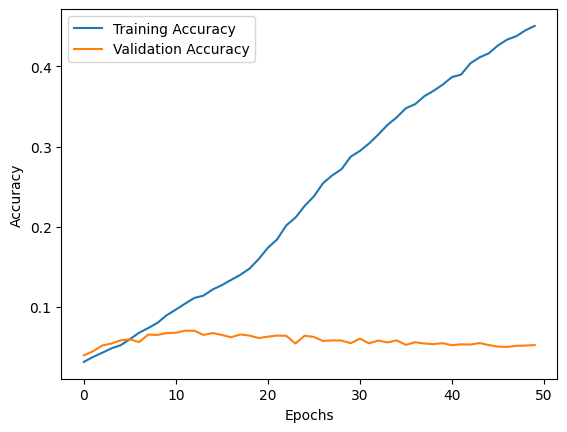

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
def predict_next_word(model, tokenizer, text, max_sequence_length):
    # Convert the text to a sequence of integers
    token_list = tokenizer.texts_to_sequences([text])[0]

    if len(token_list) > max_sequence_length - 1:
        token_list = token_list[-(max_sequence_length - 1):]
    
    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    
    # Predict the next word
    predicted = model.predict(token_list, verbose=0)
    
    # Get the index of the predicted word
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [32]:
input_text = "Mar. Horatio saies, 'tis but our"
print(f"Input text: {input_text}")
max_sequence_len = model.input_shape[1]+1
next_word = predict_next_word(model, tokenizer, input_text, max_sequence_len)
print(f"Predicted next word: {next_word}")

Input text: Mar. Horatio saies, 'tis but our
Predicted next word: fantasie


In [33]:
## Save the model
model.save('next_word_lstm.h5')

## Save the tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)